## Imports

In [103]:
from scipy.io.wavfile import write
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

## Reading and Saving files as wave

In [104]:
echo_path = "D:/4th Year/1st Term/IOT/Dr Sofy/Hearing Aid/echo-ha/noise_57.xlsx"
echo_df = pd.read_excel(echo_path)

In [105]:
echo = echo_df.values
echo = echo.flatten()
echo = echo.T
echo_original = echo

In [106]:
echo = (echo).astype(np.int16)
write("C:/Users/Misara/OneDrive/Desktop/echo_57.wav", 11025, echo)

In [107]:
clean_path = "D:/4th Year/1st Term/IOT/Dr Sofy/Hearing Aid/echo-ha/clean_57.xlsx"
clean_df = pd.read_excel(clean_path)

In [108]:
clean = clean_df.values
clean = clean.flatten()
clean = clean.T
clean_original = clean

In [109]:
clean = (clean).astype(np.int16)
write("C:/Users/Misara/OneDrive/Desktop/clean_57.wav", 11025, clean)

## Processing

In [110]:
echo

array([  154, -1379, -2424, ...,   -19,   -29,   -28], dtype=int16)

In [111]:
echo = echo/3000
echo

array([ 0.05133333, -0.45966667, -0.808     , ..., -0.00633333,
       -0.00966667, -0.00933333])

In [112]:
len(echo)

22050

## Weights initialization

In [113]:
w_old = []
for i in range(100):
    w_old.append(random.uniform(0,0.02))

In [114]:
w_old = np.array(w_old)
w_old_T = w_old.T
w_old_T.shape

(100,)

In [115]:
window_size = 100
miu = 0.0000001
for i in range(3307 , 22050):
    window = echo[i:i+window_size]
    #print(window)
    #print(i)
    
    est = np.dot(window,w_old_T)
    #print(est)
    if(i+window_size == (len(echo)-1) ):
        break
    echo[i+window_size] = echo[i+window_size] - est
    #summation= np.dot(window,window)
    w_old_T = w_old_T + (miu * est * window)

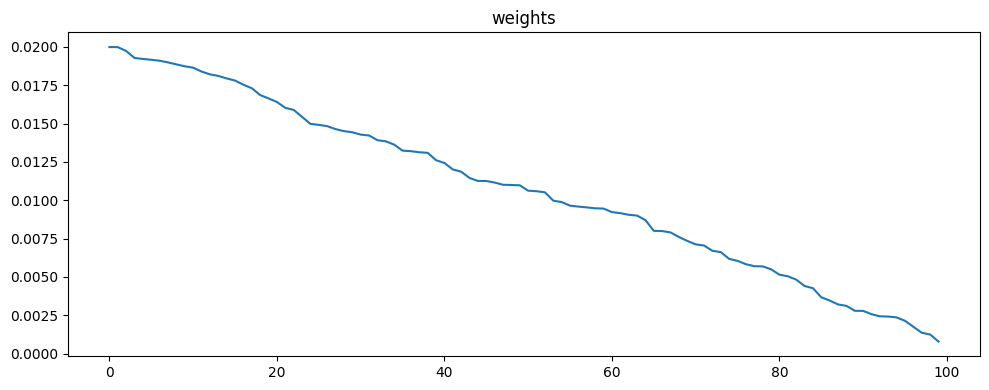

In [116]:
w1 = sorted(w_old_T, reverse= True)
# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 1, figsize=(10, 4))

# Plot the first set of values in the first subplot
axs.plot(w1)
axs.set_title('weights')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

In [117]:
window_size = 50
w_old_T = w_old_T[0:50]
miu = 0.0000001
for i in range(3307 , 22050):
    window = echo[i:i+window_size]
    est = np.dot(window,w_old_T)
    #print(est)
    if(i+window_size == (len(echo)-1)):
        break
    echo[i+window_size] = echo[i+window_size] - est
    #summation= np.dot(window,window)
    w_old_T = w_old_T + (miu * est * window)

In [118]:
processed = echo*3000
processed_original = processed

## Saving as new wav file

In [119]:
processed = (processed).astype(np.int16)
write("C:/Users/Misara/OneDrive/Desktop/processed_57.wav", 11025, processed)

## Plotting Echo vs Processed

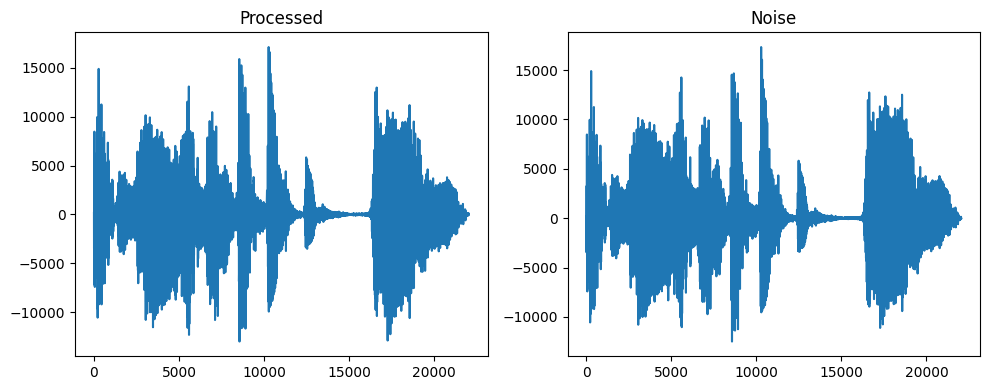

In [120]:
# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot the first set of values in the first subplot
axs[0].plot(processed_original)
axs[0].set_title('Processed')

# Plot the second set of values in the second subplot
axs[1].plot(echo_original)
axs[1].set_title('Noise')


# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

## Plotting CLean vs Processed

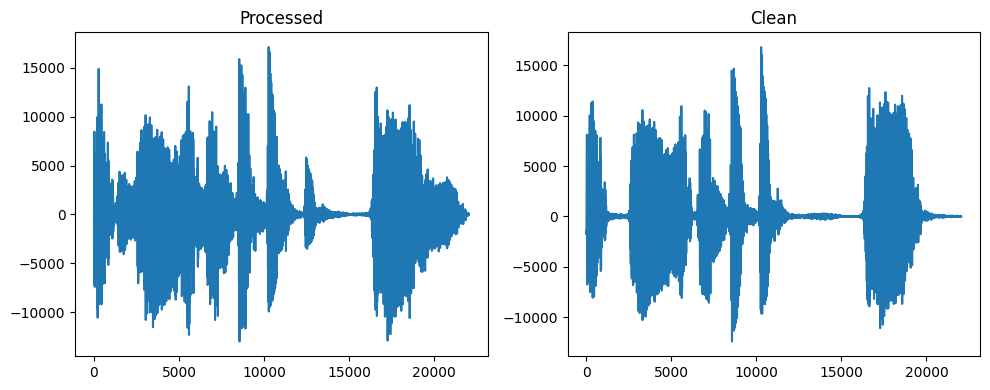

In [121]:
# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot the first set of values in the first subplot
axs[0].plot(processed_original)
axs[0].set_title('Processed')

# Plot the second set of values in the second subplot
axs[1].plot(clean_original)
axs[1].set_title('Clean')


# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()